# Ariline Customer Satisfaction (Lab 2: DS7331)

SMU Student collaboration:
1. Renfeng Wang
2. Alexander Sepenu
3. Zachary Zaiken
4. Venkata 'MG' Vanga
---------------------------------------------


In continuation of the discussion from Mini Lab, we continue with the Airline customer satisfaction data set for this Lab 2 to focus on more classification models and apply models to a different attribute.

## 1. Data Preparation

The code below shows one-hot encoding, PCA and how we split the explanatory variable and response variable. In lab 2, we are still going to use statisfaction attriburte as our response variable. In addition, we will try to predict whether the customer found the flight to be clean or not. Thus, we will have two sets of explanatory variable and response variable.	

### A. Create explanatory variable and response variable split for satisfaction variable

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

airline_df = pd.read_csv('https://raw.githubusercontent.com/wangrenfeng0/Machine-Learning-I/main/airline_passenger_satisfaction.csv') 

if 'Unnamed: 0' in airline_df:
    del airline_df['Unnamed: 0']

airline_df = airline_df.dropna()

Satisfaction ={'neutral or dissatisfied':0,'satisfied':1}
airline_df.satisfaction = [Satisfaction[item] for item in airline_df.satisfaction]

airline_df['flight_range'] = pd.cut(airline_df.flight_distance,[0,750,2000,10000],3,labels=[0,1,2])
airline_df.flight_range = airline_df.flight_range.astype(int)

airline_df['departure_delay_range'] = pd.cut(airline_df.departure_delay_in_minutes,[-1,30,90,1600],3,labels=[0,1,2])
airline_df.departure_delay_range = airline_df.departure_delay_range.astype(int)

airline_df['arrival_delay_range'] = pd.cut(airline_df.arrival_delay_in_minutes,[-1,30,90,1600],3,labels=[0,1,2])
airline_df.arrival_delay_range = airline_df.arrival_delay_range.astype(int)

airline_df['age_range'] = pd.cut(airline_df.age,[0,16,65,120],3,labels=[0,1,2])
airline_df.age_range = airline_df.age_range.astype(int)

X_a = airline_df.drop('satisfaction', axis=1).copy()


y_a= airline_df['satisfaction'].copy()

    
X_a = pd.get_dummies(X_a, columns=['Gender', 'customer_type','type_of_travel','customer_class',
                                       'flight_range','departure_delay_range','arrival_delay_range',
                                       'age_range'])

if 'Gender' in X_a:
    del X_a['Gender'] 
    
if 'customer_type' in X_a:    
    del X_a['customer_type'] 

if 'age' in X_a:    
    del X_a['age'] 
    
if 'type_of_travel' in X_a:    
    del X_a['type_of_travel'] 
    
if 'customer_class' in X_a:    
    del X_a['customer_class'] 
    
if 'flight_distance' in X_a:    
    del X_a['flight_distance'] 

if 'departure_delay_in_minutes' in X_a:    
    del X_a['departure_delay_in_minutes'] 
    
if 'arrival_delay_in_minutes' in X_a:    
    del X_a['arrival_delay_in_minutes'] 

airline_df_dummy_satisfied = pd.concat((X_a,y_a),axis=1)
airline_df_dummy_satisfied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 36 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   inflight_wifi_service              129487 non-null  int64
 1   departure_arrival_time_convenient  129487 non-null  int64
 2   ease_of_online_booking             129487 non-null  int64
 3   gate_location                      129487 non-null  int64
 4   food_and_drink                     129487 non-null  int64
 5   online_boarding                    129487 non-null  int64
 6   seat_comfort                       129487 non-null  int64
 7   inflight_entertainment             129487 non-null  int64
 8   onboard_service                    129487 non-null  int64
 9   leg_room_service                   129487 non-null  int64
 10  baggage_handling                   129487 non-null  int64
 11  checkin_service                    129487 non-null  int64
 12  in

In [4]:
X_a = X_a.values
y_a= y_a.values
airline_df_dummy_satisfied.head()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,...,departure_delay_range_0,departure_delay_range_1,departure_delay_range_2,arrival_delay_range_0,arrival_delay_range_1,arrival_delay_range_2,age_range_0,age_range_1,age_range_2,satisfaction
0,3,4,3,1,5,3,5,5,4,3,...,1,0,0,1,0,0,1,0,0,0
1,3,2,3,3,1,3,1,1,1,5,...,1,0,0,1,0,0,0,1,0,0
2,2,2,2,2,5,5,5,5,4,3,...,1,0,0,1,0,0,0,1,0,1
3,2,5,5,5,2,2,2,2,2,5,...,1,0,0,1,0,0,0,1,0,0
4,3,3,3,3,4,5,5,3,3,4,...,1,0,0,1,0,0,0,1,0,1


### B. Create explanatory variable and response variable split for cleanliness variable

In [5]:
airline_df['clean'] = pd.cut(airline_df.cleanliness,[-1,2,6],2,labels=[0,1])
airline_df['clean'] = airline_df['clean'].astype(int)

X_b = airline_df.drop(['clean', 'cleanliness'], axis=1).copy()


y_b= airline_df['clean'].copy()

    
X_b = pd.get_dummies(X_b, columns=['Gender', 'customer_type','type_of_travel','customer_class',
                                       'flight_range','age_range','satisfaction'])

if 'Gender' in X_b:
    del X_a['Gender'] 
    
if 'customer_type' in X_b:    
    del X_b['customer_type'] 

if 'age' in X_b:    
    del X_b['age'] 
    
if 'type_of_travel' in X_b:    
    del X_b['type_of_travel'] 
    
if 'customer_class' in X_b:    
    del X_b['customer_class'] 
    
if 'flight_distance' in X_b:    
    del X_b['flight_distance'] 

if 'departure_delay_in_minutes' in X_b:    
    del X_b['departure_delay_in_minutes'] 
    
if 'arrival_delay_in_minutes' in X_b:    
    del X_b['arrival_delay_in_minutes'] 

if 'satisfaction' in X_b:    
    del X_b['satisfaction']

airline_df_dummy_clean = pd.concat((X_b,y_b),axis=1)
airline_df_dummy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   inflight_wifi_service              129487 non-null  int64
 1   departure_arrival_time_convenient  129487 non-null  int64
 2   ease_of_online_booking             129487 non-null  int64
 3   gate_location                      129487 non-null  int64
 4   food_and_drink                     129487 non-null  int64
 5   online_boarding                    129487 non-null  int64
 6   seat_comfort                       129487 non-null  int64
 7   inflight_entertainment             129487 non-null  int64
 8   onboard_service                    129487 non-null  int64
 9   leg_room_service                   129487 non-null  int64
 10  baggage_handling                   129487 non-null  int64
 11  checkin_service                    129487 non-null  int64
 12  in

In [6]:
X_b = X_b.values
y_b= y_b.values
airline_df_dummy_clean.head()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,...,customer_class_Eco Plus,flight_range_0,flight_range_1,flight_range_2,age_range_0,age_range_1,age_range_2,satisfaction_0,satisfaction_1,clean
0,3,4,3,1,5,3,5,5,4,3,...,1,1,0,0,1,0,0,1,0,1
1,3,2,3,3,1,3,1,1,1,5,...,0,1,0,0,0,1,0,1,0,0
2,2,2,2,2,5,5,5,5,4,3,...,0,0,1,0,0,1,0,0,1,1
3,2,5,5,5,2,2,2,2,2,5,...,0,1,0,0,0,1,0,1,0,0
4,3,3,3,3,4,5,5,3,3,4,...,0,1,0,0,0,1,0,0,1,1


## 2. Modeling and Evaluation

### a. Evaluation Metrics

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y,predictions)
    confMat = confusion_matrix(y,predictions)
    acc = accuracy_score(y,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)


### b. Cross Validation Method

For both classification tasks and all models, 10 fold stratified K-fold cross validation will be used.  Using stratified ensures that the same class split percentages across all test and training splits are the same.  This is important as both of these classes are imbalanced (reference histograms below), esecially cleanliness.  This ensures that for all for modeling fitting and testing that the same population split of class is maintained.  K fold also ensures that each test set are independent from one another.  Other methodolgies such as shuffle split will not maintain this independence creating possible bias or overfitting in the model.  Using 10 fold ensures the right balance and tradeoff between variance and bias and will ensure the model and predictions are generated and used responsibly.

array([<AxesSubplot:title={'center':'clean'}>], dtype=object)

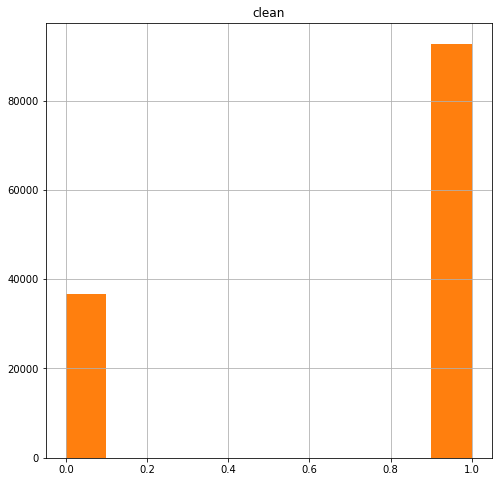

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(1,1,figsize=(8, 8))
airline_df_dummy_clean[['clean']].hist(ax=axis)


array([<AxesSubplot:title={'center':'satisfaction'}>], dtype=object)

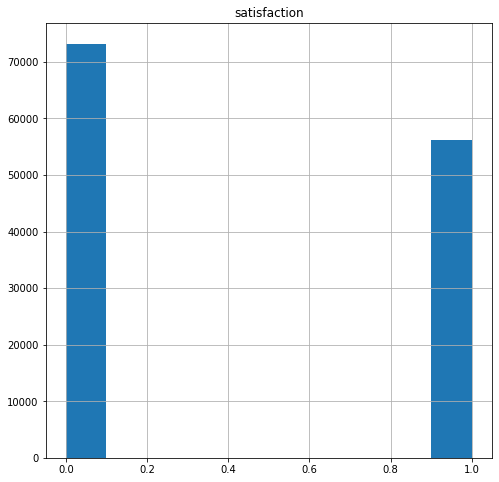

In [53]:
fig, axis = plt.subplots(1,1,figsize=(8, 8))
airline_df_dummy_satisfied[['satisfaction']].hist(ax=axis)

In [54]:
#Create Scaler
scl = StandardScaler()

#Split the data
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=5)                     
print(cv)

StratifiedKFold(n_splits=10, random_state=5, shuffle=True)


For more complex and computationally expensive models (such as neurel networks, random forests, SVM). A trimmed down sub sample of the datasets are created by taking a random sample of 30,000 records.  This is done to ensure that the grid search and tuning of parameters can be done in a timely manner.  Using the full dataset on this can take hours and is not practical use of time or resources.  The sub sampling is large enough to ensure there is enough training data to create and hypertune accurate models. 

In [43]:
#Down size the data to 30000 samples for satisfaction classification
model_satisfied = airline_df_dummy_satisfied.sample(n = 30000, random_state=5).copy()
model_satisfied_y = model_satisfied['satisfaction'].copy()
model_satisfied_x = model_satisfied.loc[:, model_satisfied.columns != 'satisfaction'].copy()

model_satisfied_x = model_satisfied_x.values
model_satisfied_y= model_satisfied_y.values

In [ ]:
#Down size the data to 30000 samples for ease_of_online_booking classification
model_clean = airline_df_dummy_clean.sample(n = 30000, random_state=5).copy()
model_clean_y = model_clean['clean'].copy()
model_clean_x = model_clean.loc[:, model_clean.columns != 'clean'].copy()

model_clean_x = model_clean_x.values
model_clean_y= model_clean_y.values

# MG's

## Add Two portions of PCA code to show how many components we need

## Add info() and describe() for final data

## Why we chose to use accuracy, precision and recall as our data measurement

## Answer bottom three questions(ROC Curve, pair t test and attributes weight analysis)


# Zach's 

## Why we chose stratified K fold to split the data

## Deployment writeup

## Bold the exceptional work we did

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

#Create Pipeline for scaler, PCA and model classifier

# LogisticRegression
regEstimator = LogisticRegression()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = { 'clf__penalty':['l2','l1']
              ,'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'clf__class_weight': ['balanced','none']
              ,'clf__random_state': [5]
              ,'clf__solver': ['liblinear']
              ,'clf__max_iter':[100,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(X_a, y_a)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', LogisticRegression())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__class_weight': ['balanced', 'none'],
                         'clf__max_iter': [100, 500],
                         'clf__penalty': ['l2', 'l1'], 'clf__random_state': [5],
                         'clf__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [46]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=5, solver='liblinear'))])

In [47]:
classifierEst_1 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_1, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.85551
The average precision for all cv folds is: 			 0.82189
The average recall for all cv folds is: 			 0.85096
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.854969,0.825810,0.850538
1,0.858985,0.825375,0.853329
2,0.854352,0.819817,0.851615
3,0.853811,0.820866,0.849965
4,0.855510,0.823458,0.846319
5,0.855665,0.824123,0.851361
6,0.854352,0.819006,0.849964
7,0.857170,0.820473,0.854472
8,0.855240,0.820009,0.852437
9,0.855085,0.819931,0.849600


In [51]:
# Random Forest
regEstimator = RandomForestClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__n_estimators':[100,150,200]
              ,'clf__class_weight':['balanced','none']
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__n_estimators': [100, 150, 200],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [52]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=20,
                                        n_estimators=200, random_state=5))])

In [53]:
classifierEst_3 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_3, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.92315
The average precision for all cv folds is: 			 0.93407
The average recall for all cv folds is: 			 0.88512
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.921036,0.934154,0.883198
1,0.922504,0.931711,0.885046
2,0.922542,0.933690,0.884352
3,0.923855,0.936773,0.884970
4,0.922426,0.934269,0.882142
5,0.921577,0.933595,0.883351
6,0.925438,0.936136,0.887585
7,0.925129,0.934943,0.887461
8,0.924705,0.934529,0.888145
9,0.922272,0.930865,0.884978


In [54]:
# Support Vector Machine
regEstimator = SVC()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
              'clf__kernel':['rbf'], 
              'clf__degree':[3], 
              'clf__random_state':[5],
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', SVC())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__degree': [3],
                         'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'clf__kernel': ['rbf'], 'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [55]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf', SVC(C=100, gamma=0.01, random_state=5))])

In [56]:
classifierEst_4 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_4, model_satisfied_x, model_satisfied_y, cv)

The average accuracy for all cv folds is: 			 0.9228
The average precision for all cv folds is: 			 0.92118
The average recall for all cv folds is: 			 0.90144
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.920333,0.921392,0.894797
1,0.928167,0.930769,0.906028
2,0.916500,0.917276,0.892884
3,0.921500,0.919572,0.896485
4,0.925833,0.928709,0.902622
5,0.926167,0.921454,0.906923
6,0.919167,0.906995,0.903816
7,0.918833,0.919042,0.898217
8,0.928667,0.925883,0.909645
9,0.922833,0.920678,0.902946


In [57]:
# Decision Tree Model
regEstimator = DecisionTreeClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__class_weight':['balanced','none']}

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [58]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        random_state=5))])

In [59]:
classifierEst_5 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_5, model_satisfied_x, model_satisfied_y, cv)

The average accuracy for all cv folds is: 			 0.88305
The average precision for all cv folds is: 			 0.87741
The average recall for all cv folds is: 			 0.85328
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.880000,0.894108,0.824155
1,0.883167,0.881487,0.852115
2,0.877000,0.870115,0.850562
3,0.879333,0.859068,0.861723
4,0.880667,0.873186,0.856180
5,0.890333,0.878115,0.867308
6,0.886167,0.871795,0.860592
7,0.882167,0.872700,0.863299
8,0.889333,0.887307,0.855509
9,0.882333,0.886237,0.841390


### b. Cleanliness Classification Models

In [61]:
#Logistic Regression
regEstimator = LogisticRegression()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = { 'clf__penalty':['l2','l1']
              ,'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'clf__class_weight': ['balanced','none']
              ,'clf__random_state': [5]
              ,'clf__solver': ['liblinear']
              ,'clf__max_iter':[100,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

regGridSearch.fit(X_b, y_b)

Fitting 10 folds for each of 56 candidates, totalling 560 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', LogisticRegression())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'clf__class_weight': ['balanced', 'none'],
                         'clf__max_iter': [100, 500],
                         'clf__penalty': ['l2', 'l1'], 'clf__random_state': [5],
                         'clf__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [62]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 LogisticRegression(C=10, class_weight='balanced',
                                    random_state=5, solver='liblinear'))])

In [63]:
classifierEst_6 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_6, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.86039
The average precision for all cv folds is: 			 0.93643
The average recall for all cv folds is: 			 0.86361
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.860877,0.935375,0.865672
1,0.860491,0.936100,0.863555
2,0.860723,0.936114,0.864172
3,0.862113,0.938695,0.864766
4,0.861070,0.937218,0.863830
5,0.862460,0.937092,0.866034
6,0.856862,0.934667,0.859447
7,0.861456,0.936646,0.865638
8,0.858136,0.935880,0.860431
9,0.859680,0.936545,0.862526


In [67]:
# Random Forest
regEstimator = RandomForestClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__n_estimators':[100,150,200]
              ,'clf__class_weight':['balanced','none']
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', RandomForestClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__n_estimators': [100, 150, 200],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [68]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        n_estimators=150, random_state=5))])

In [69]:
classifierEst_8 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_8, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.90264
The average precision for all cv folds is: 			 0.91174
The average recall for all cv folds is: 			 0.95661
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.902734,0.911282,0.957487
1,0.899143,0.907635,0.956033
2,0.902425,0.911346,0.956578
3,0.903699,0.912166,0.958394
4,0.904162,0.913751,0.956426
5,0.903545,0.913505,0.955776
6,0.900610,0.909639,0.955621
7,0.905746,0.914733,0.958062
8,0.901730,0.911180,0.955638
9,0.902618,0.912153,0.956116


In [70]:
# Support Vector Machine
regEstimator = SVC()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
              'clf__kernel':['rbf'], 
              'clf__degree':[3],
              'clf__random_state':[5],
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', SVC())]),
             n_jobs=7,
             param_grid={'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'clf__degree': [3],
                         'clf__gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001],
                         'clf__kernel': ['rbf'], 'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [71]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf', SVC(C=1, gamma='auto', random_state=5))])

In [72]:
classifierEst_9 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_9, model_clean_x, model_clean_y, cv)

The average accuracy for all cv folds is: 			 0.90553
The average precision for all cv folds is: 			 0.90648
The average recall for all cv folds is: 			 0.96813
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.908000,0.906690,0.971919
1,0.904500,0.905677,0.968606
2,0.902833,0.908893,0.962247
3,0.908833,0.906850,0.971943
4,0.907333,0.910327,0.965806
5,0.904500,0.905224,0.966353
6,0.906167,0.907906,0.967817
7,0.903667,0.903045,0.970077
8,0.904667,0.902555,0.971562
9,0.904833,0.907655,0.965019


In [73]:
# Decision Tree Model
regEstimator = DecisionTreeClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),
])

parameters = {'clf__criterion': ['gini','entropy']
              ,'clf__random_state': [5]
              ,'clf__max_depth': [10,20,50]
              ,'clf__class_weight':['balanced','none']}

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')


regGridSearch.fit(X_b, y_b)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', DecisionTreeClassifier())]),
             n_jobs=7,
             param_grid={'clf__class_weight': ['balanced', 'none'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [10, 20, 50],
                         'clf__random_state': [5]},
             scoring='accuracy', verbose=1)

In [74]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        random_state=5))])

In [75]:
classifierEst_10 = regGridSearch.best_estimator_
EvaluateClassifierEstimator(classifierEst_10, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.86727
The average precision for all cv folds is: 			 0.9079
The average recall for all cv folds is: 			 0.90656
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.868909,0.907766,0.909478
1,0.864198,0.904484,0.905413
2,0.867905,0.907554,0.907701
3,0.869411,0.909658,0.908681
4,0.862306,0.906255,0.900879
5,0.867750,0.908325,0.906806
6,0.868098,0.907605,0.907507
7,0.869449,0.910809,0.907038
8,0.868137,0.908820,0.906414
9,0.866515,0.907760,0.905655


## 3. Exceptional Work: Neural Network Classifier

In addition to the logistic regression, random forest, support vector machine and decision tree models that were done for flight satisfaction and cleanliness, a nuerel network classifier was used in an attempt to maximize model accuracy. The model used is from the sklearn.neural_network module. In the code below we will utilize MLPClassifier() the Multi-layer Perceptron classifier.  This model works by optimzing the log-loss function using LBFGS or stochastic gradient descent.  In addition, the model trains iteraively.  MLPClassifier relies on an underlying Neural Network to perform classification tasks. 

The code below shows the steps to hypertune a nueral network MLPClassifier using gridsearchCV, as well as the results of a 10-fold cross validation for accuracy, precision and recall.  The results of the model as well as its comparison against the 4 previous model will be explored in the subsequent sections of the report.

In [48]:
# MLPClassifier
regEstimator = MLPClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),\
])

parameters = { 'clf__alpha': [0.01, 1, 10, 100, 1000]
              ,'clf__random_state': [5]
              ,'clf__solver': ['lbfgs','sgd', 'adam']
              ,'clf__learning_rate':['constant', 'invscaling']
              ,'clf__max_iter':[200,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

#X_scaled_satisfied = scl.transform(model_satisfied_x)
regGridSearch.fit(model_satisfied_x, model_satisfied_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', MLPClassifier())]),
             n_jobs=7,
             param_grid={'clf__alpha': [0.01, 1, 10, 100, 1000],
                         'clf__learning_rate': ['constant', 'invscaling'],
                         'clf__max_iter': [200, 500], 'clf__random_state': [5],
                         'clf__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [49]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 MLPClassifier(alpha=10, max_iter=500, random_state=5,
                               solver='lbfgs'))])

In [50]:
classifierEst_2 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_2, X_a, y_a, cv)

The average accuracy for all cv folds is: 			 0.93572
The average precision for all cv folds is: 			 0.93731
The average recall for all cv folds is: 			 0.9127
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.934203,0.935077,0.914281
1,0.935014,0.934372,0.913359
2,0.936289,0.939108,0.912374
3,0.935092,0.937255,0.912088
4,0.934512,0.937616,0.908562
5,0.934319,0.936768,0.911188
6,0.937061,0.938224,0.914188
7,0.939532,0.941687,0.915955
8,0.935400,0.935552,0.913587
9,0.935748,0.937471,0.911376


In [64]:
# MLPClassifier
regEstimator = MLPClassifier()

pipeline = Pipeline([
    ('scale', scl),
    ('PCA',PCA(n_components=15, svd_solver='auto')),
    ('clf', regEstimator),\
])

parameters = { 'clf__alpha': [0.01, 1, 10, 100, 1000]
              ,'clf__random_state': [5]
              ,'clf__solver': ['lbfgs','sgd', 'adam']
              ,'clf__learning_rate':['constant', 'invscaling']
              ,'clf__max_iter':[200,500]
             }

regGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=7, verbose=1, scoring='accuracy')

regGridSearch.fit(model_clean_x, model_clean_y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.2, train_size=None),
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('PCA', PCA(n_components=15)),
                                       ('clf', MLPClassifier())]),
             n_jobs=7,
             param_grid={'clf__alpha': [0.01, 1, 10, 100, 1000],
                         'clf__learning_rate': ['constant', 'invscaling'],
                         'clf__max_iter': [200, 500], 'clf__random_state': [5],
                         'clf__solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=1)

In [65]:
regGridSearch.best_estimator_

Pipeline(steps=[('scale', StandardScaler()), ('PCA', PCA(n_components=15)),
                ('clf',
                 MLPClassifier(alpha=100, max_iter=500, random_state=5,
                               solver='lbfgs'))])

In [66]:
classifierEst_7 = regGridSearch.best_estimator_

EvaluateClassifierEstimator(classifierEst_7, X_b, y_b, cv)

The average accuracy for all cv folds is: 			 0.90418
The average precision for all cv folds is: 			 0.9078
The average recall for all cv folds is: 			 0.96408
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.902850,0.907162,0.962983
1,0.900919,0.903594,0.964091
2,0.903931,0.906183,0.965597
3,0.906865,0.909697,0.966447
4,0.905861,0.910193,0.963598
5,0.905591,0.908616,0.965214
6,0.902772,0.907637,0.961574
7,0.905437,0.909234,0.964622
8,0.903854,0.908035,0.962987
9,0.903738,0.907637,0.963664


In [77]:
# ROC for all models for satisfaction classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


classifiers_a = [LogisticRegression(C=1000, class_weight='balanced',
                                    random_state=5, solver='liblinear'), 
               DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        random_state=5),
               RandomForestClassifier(class_weight='balanced', max_depth=20,n_jobs=7,
                                        n_estimators=200, random_state=5),
               SVC(C=1, gamma='auto',degree=3,kernel='rbf',random_state=5,probability=True),
               MLPClassifier(alpha=10, max_iter=500, random_state=5,
                               solver='lbfgs')]

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, random_state=5, test_size=0.2,stratify=y)
scaler_a = preprocessing.StandardScaler().fit(X_train_a)
X_train_scaled_a = scaler_a.transform(X_train_a)
X_test_scaled_a = scaler_a.transform(X_test_a)

result_table_a = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_a:
    model_a = cls.fit(X_train_scaled_a, y_train_a)
    yhat_a = model_a.predict_proba(X_test_scaled_a)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_a,  yhat_a)
    auc = roc_auc_score(y_test_a, yhat_a)
    
    result_table_a = result_table_a.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)


In [78]:
result_table_a.set_index('classifiers', inplace=True)

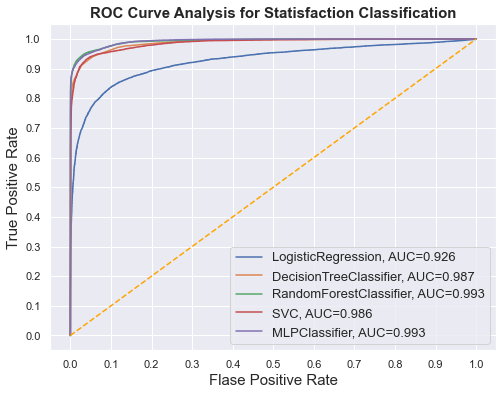

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize=(8,6))

for i in result_table_a.index:
    plt.plot(result_table_a.loc[i]['fpr'], 
             result_table_a.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_a.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Statisfaction Classification', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [80]:
# ROC for all models for cleanliness classification

classifiers_b = [LogisticRegression(C=10, class_weight='balanced',
                                    random_state=5, solver='liblinear'), 
               DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,
                                        random_state=5),
               RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=50,n_jobs=7,
                                        n_estimators=150, random_state=5),
               SVC(C=1, gamma='auto',degree=3,kernel='rbf',random_state=5,probability=True),
               MLPClassifier(alpha=100, max_iter=500, random_state=5,
                               solver='lbfgs')]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, random_state=5, test_size=0.2,stratify=y)
scaler_b = preprocessing.StandardScaler().fit(X_train_b)
X_train_scaled_b = scaler_b.transform(X_train_b)
X_test_scaled_b = scaler_b.transform(X_test_b)

result_table_b = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers_b:
    model_b = cls.fit(X_train_scaled_b, y_train_b)
    yhat_b = model_b.predict_proba(X_test_scaled_b)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test_b,  yhat_b)
    auc = roc_auc_score(y_test_b, yhat_b)
    
    result_table_b = result_table_b.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table_b.set_index('classifiers', inplace=True)

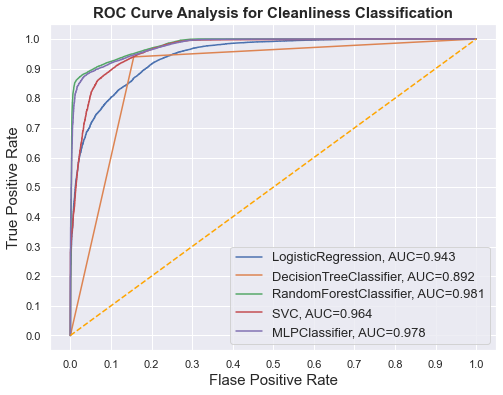

In [81]:
fig = plt.figure(figsize=(8,6))

for i in result_table_b.index:
    plt.plot(result_table_b.loc[i]['fpr'], 
             result_table_b.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table_b.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Cleanliness Classification', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [82]:
#Satisfaction classification shows Random Forest and MLP classifers have top two accuracies 
from mlxtend.evaluate import paired_ttest_5x2cv

clf1_a = RandomForestClassifier(class_weight='balanced', max_depth=20,n_jobs=7, n_estimators=200, random_state=5)
clf2_a = MLPClassifier(alpha=10, max_iter=500, random_state=5, solver='lbfgs')

score1_a = clf1_a.fit(X_train_scaled_a, y_train_a).score(X_test_scaled_a, y_test_a)
score2_a = clf2_a.fit(X_train_scaled_a, y_train_a).score(X_test_scaled_a, y_test_a)

print('Random Forest accuracy: %.2f%%' % (score1_a*100))
print('Multi-layer Perceptron accuracy: %.2f%%' % (score2_a*100))

Random Forest accuracy: 95.93%
Multi-layer Perceptron accuracy: 95.66%


In [83]:
t, p = paired_ttest_5x2cv(estimator1=clf1_a, estimator2=clf2_a, X=X_a, y=y_a, random_seed=5)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 1.694
p value: 0.151


In [84]:
#Cleanliness classification shows Random Forest and MLP classifers have top two accuracies
clf1_b = RandomForestClassifier(class_weight='balanced', criterion='entropy', max_depth=50,n_jobs=7, n_estimators=150, random_state=5)
clf2_b = MLPClassifier(alpha=100, max_iter=500, random_state=5, solver='lbfgs')

score1_b = clf1_b.fit(X_train_scaled_b, y_train_b).score(X_test_scaled_b, y_test_b)
score2_b = clf2_b.fit(X_train_scaled_b, y_train_b).score(X_test_scaled_b, y_test_b)

print('Random Forest accuracy: %.2f%%' % (score1_b*100))
print('Multi-layer Perceptron accuracy: %.2f%%' % (score2_b*100))

Random Forest accuracy: 92.10%
Multi-layer Perceptron accuracy: 91.77%


In [85]:
t, p = paired_ttest_5x2cv(estimator1=clf1_b, estimator2=clf2_b, X=X_b, y=y_b, random_seed=5)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 3.459
p value: 0.018


In [86]:
scaler = StandardScaler()
scaler.fit(X_a)

#Transform training data to z-scores
#This makes our model's coefficients take on the same scale for accurate feature importance analisys 
X_a_Scl = scaler.transform(X_a)

regEstimator_a = RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=200, random_state=5)
regEstimator_a.fit(X_a_Scl, y_a)

RandomForestClassifier(class_weight='balanced', max_depth=50, n_estimators=200,
                       random_state=5)

In [87]:
weights = regEstimator_a.feature_importances_.ravel()
feature_names = airline_df_dummy_satisfied.drop('satisfaction', axis=1).copy().columns.values                  
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

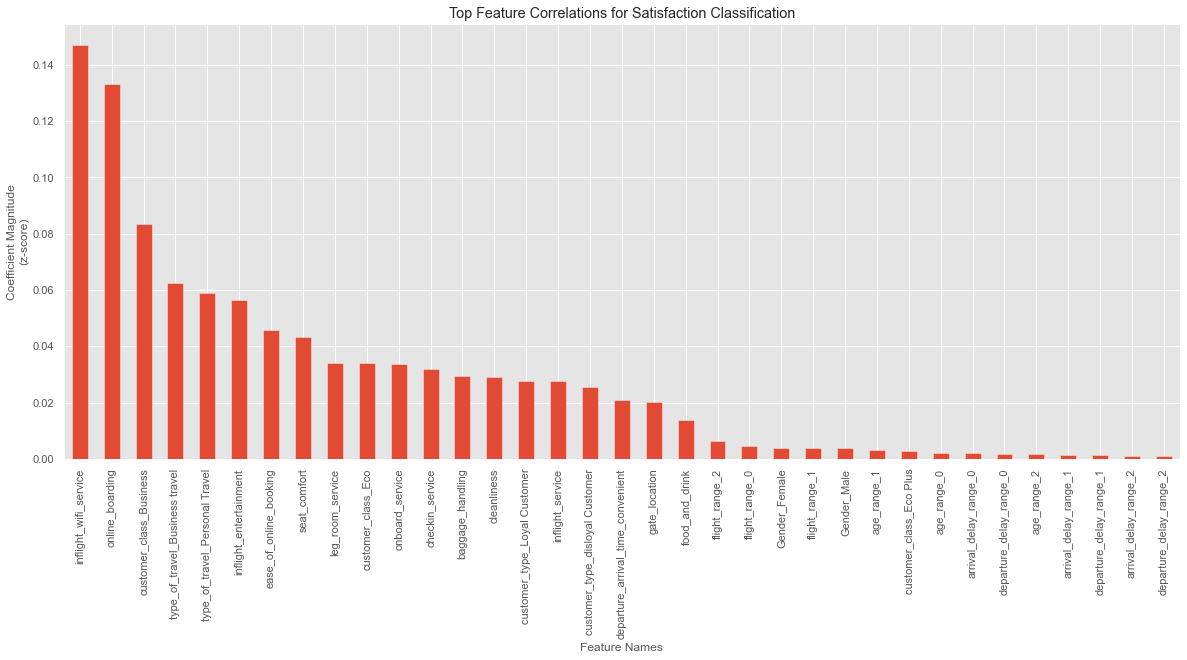

In [88]:
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Satisfaction Classification")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [89]:
scaler.fit(X_b)

X_b_Scl = scaler.transform(X_b)

regEstimator_b = RandomForestClassifier(class_weight='balanced',criterion='entropy', max_depth=50, n_estimators=150, random_state=5)
regEstimator_b.fit(X_b_Scl, y_b)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=50, n_estimators=150, random_state=5)

In [90]:
weights = regEstimator_b.feature_importances_.ravel()
feature_names = airline_df_dummy_clean.drop('clean', axis=1).copy().columns.values                                  
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

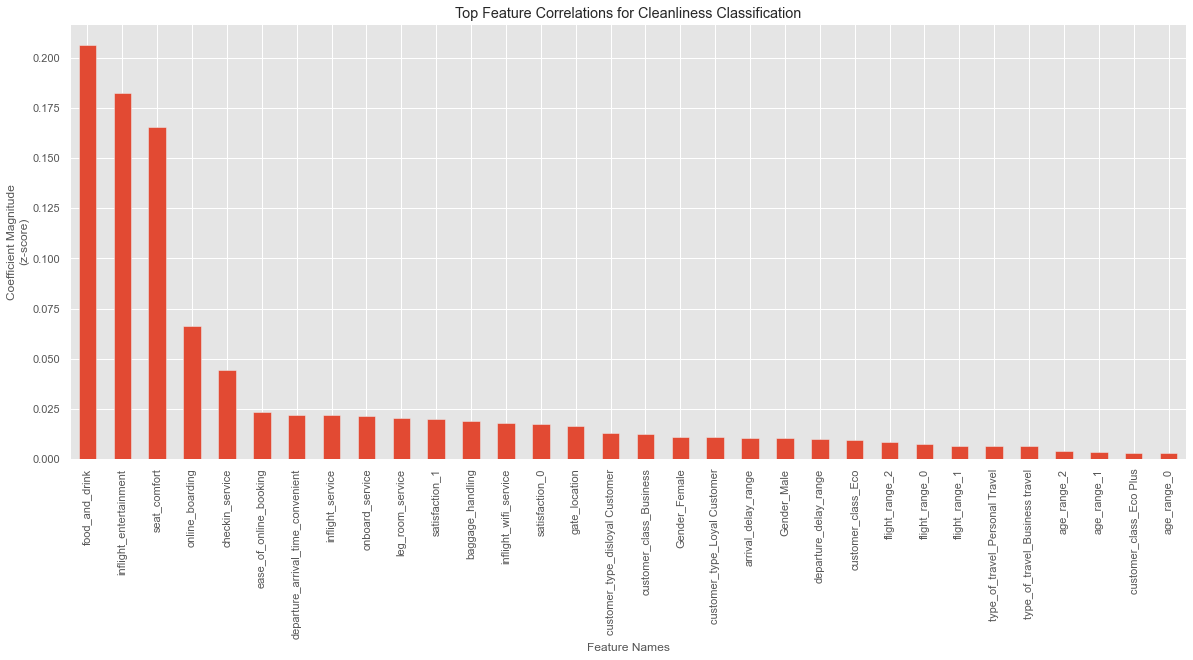

In [91]:
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations for Cleanliness Classification")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

## 3. Deployment

The models built have proven to be very accurate for predicitng flight satisfaction and cleanliness, 95% and 92% respectively.  
Companies that may find this usefull would be airline companies such as United,southwest,delta etc.  They could offer surveys to their customers during or after the flight for all the inputs that would not already be in their databases and use these to predict satisfaction or cleanliness.  With the recent events of the pandemic, cleanliness is more important now than ever, while it might be obstuse or in poor taste to ask ouright what a customers thought on cleanliness of the flight was, using the model based on correlated variables will give the airlines the statistics they need to improve it.

In addition other vendors could find these models usefull.  By referncing the variables that have the highest feature correlation to that of flight satisfaction or cleanliness, vendors can use this info to sell to new technology or services airlines and be part of their supply chain, or other companies specializing in travel accessories can market these directly to consumers.


To deploy the model there are multiple options that would available to the end customer.  Firslty the full code and all documentation would be placed on a private github to be given to the client.  This can be used or referenced by their development team, auditors ect or anyone at the customer who needs access to the raw code and full documentation.  There are multiple choices for how the end code can be used by the customer

1. Jupyter notebook: Depending on the python and technical skills of the customers employees, a simple jupyetrnotebook could be built that would allow the customer to manually upload a CSV or excel file to run predictions on new or existing data.

2. Web app deployment:  If the company is less technically savy then a webapp using Django/Flask framework can be created to make operational use of the models very easy.  Similar as above, there could be a button that allows manual uploading of excel/csv files or from a database to allow the customer to run the model without any python coding.

3. Python Executable:  If the customer does not want to pay to host a webapp on the clould ,another option would be to create an executable using pyinstaller.  This would function similar to the webapp but would be run locally on the customers desktop and python skills are not needed to run.


While the model is useful and accurate now, there could be external factors such as new technologies, pandemics, competition, etc that could create or change the factors that influence overall flight satisfaction and cleanliness.  When possible data should continouslly be collected so the model can be rerun with the latest data for training purposes.  Airline companies can use incentive based surveys to get all of the ordinal ranking information from their customer base whenever possible.  The original dataset contains ~130K records.  As new datapoints are gathered it is advised to remove the oldest from the dataset and on a quarterly basis rerun the models to be up to date with current trends.

